In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [14]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

In [35]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [99]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [183]:
monthly_data = pd.read_csv("hw-data/monthly-us-auto-registration-tho.csv", sep=';');
weekly_data = pd.read_csv("hw-data/weekly-closings-of-the-dowjones-.csv");

In [184]:
monthly_data.columns = ['Month', 'Sum']

In [185]:
weekly_data.columns = ['Week', 'Sum']

### monthly-us-auto-registration-tho

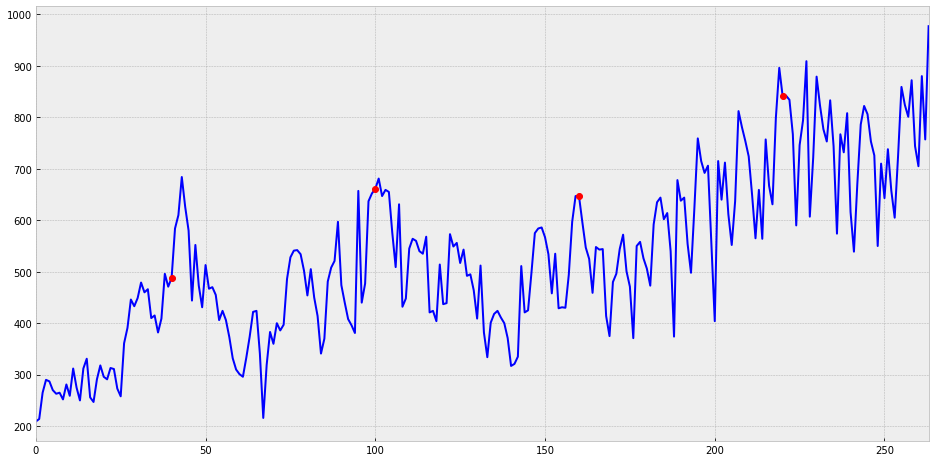

In [186]:
plot_ts_and_points(monthly_data['Sum'], 40, 60)

In [187]:
#Нормальзуем дисперсию
monthly_series = boxcox(monthly_data['Sum'], 0)

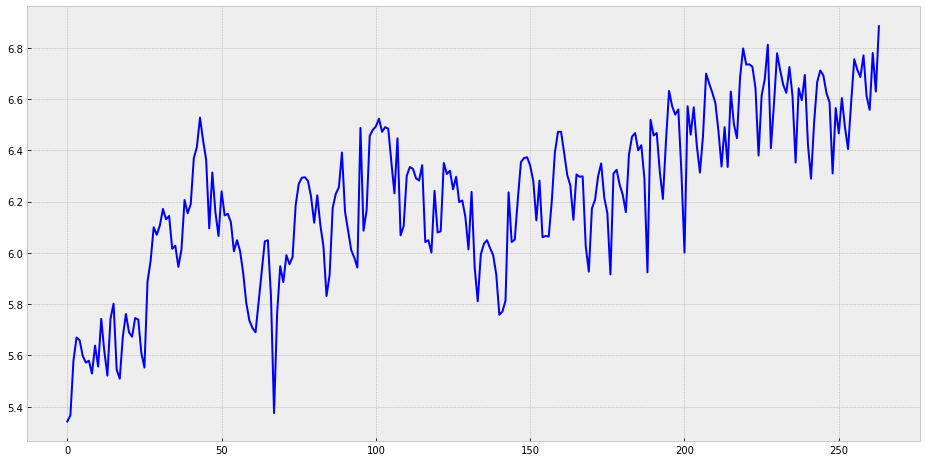

In [188]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(monthly_series, color='blue')

In [189]:
#Дифиринцируем
monthly_series = monthly_series[1:] - monthly_series[:-1]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


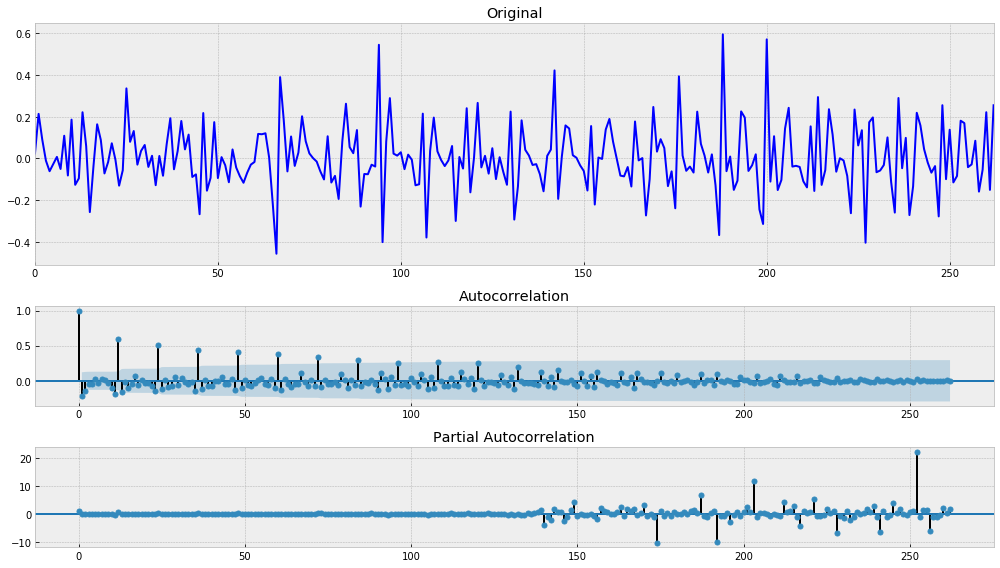

In [190]:
tsplot(monthly_series)

In [191]:
test_stationarity(monthly_series)

Results of Dickey-Fuller Test:
Test Statistic                  -4.362471
p-value                          0.000346
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [192]:
#Дифиринцируем со сдвигом 12
monthly_series1 = monthly_series[12:] - monthly_series[:-12]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


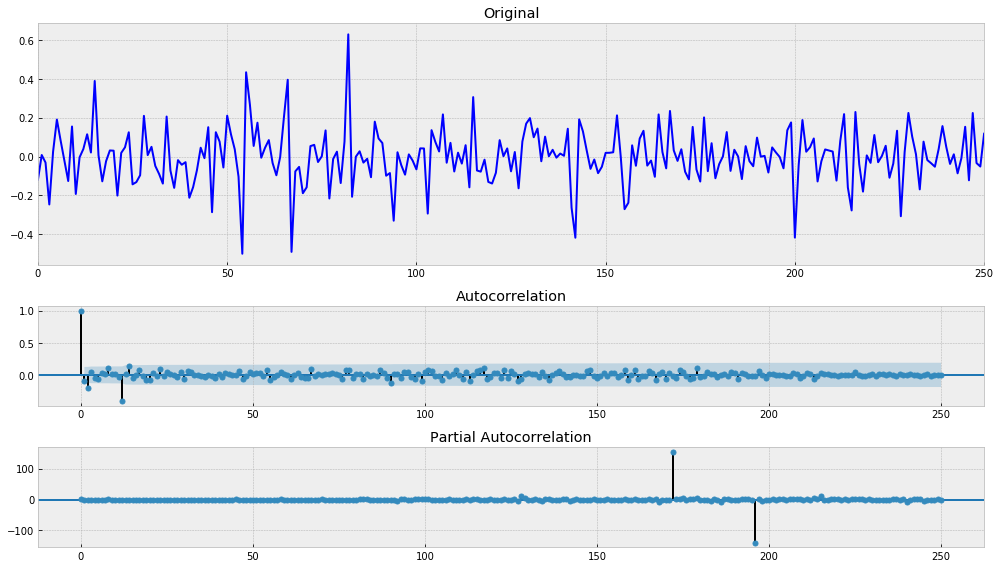

In [193]:
tsplot(monthly_series1)

In [194]:
test_stationarity(monthly_series)

Results of Dickey-Fuller Test:
Test Statistic                  -4.362471
p-value                          0.000346
#Lags Used                      14.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [195]:
#готово

### weekly-closings-of-the-dowjones

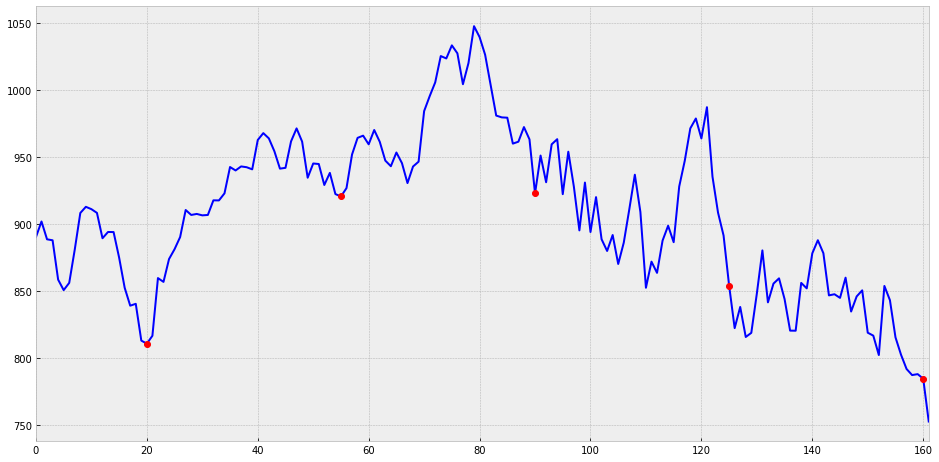

In [196]:
plot_ts_and_points(weekly_data['Sum'], 20, 35)

In [197]:
weekly_series = boxcox(weekly_data['Sum'], 0)

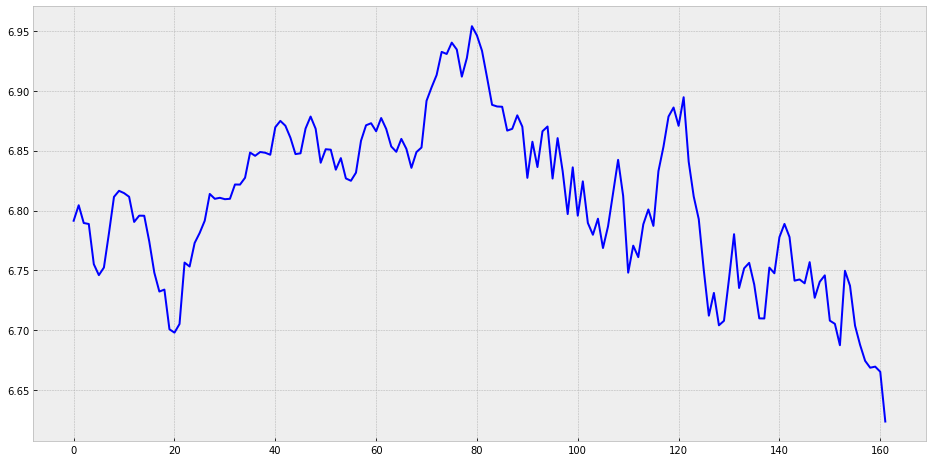

In [198]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(weekly_series, color='blue')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


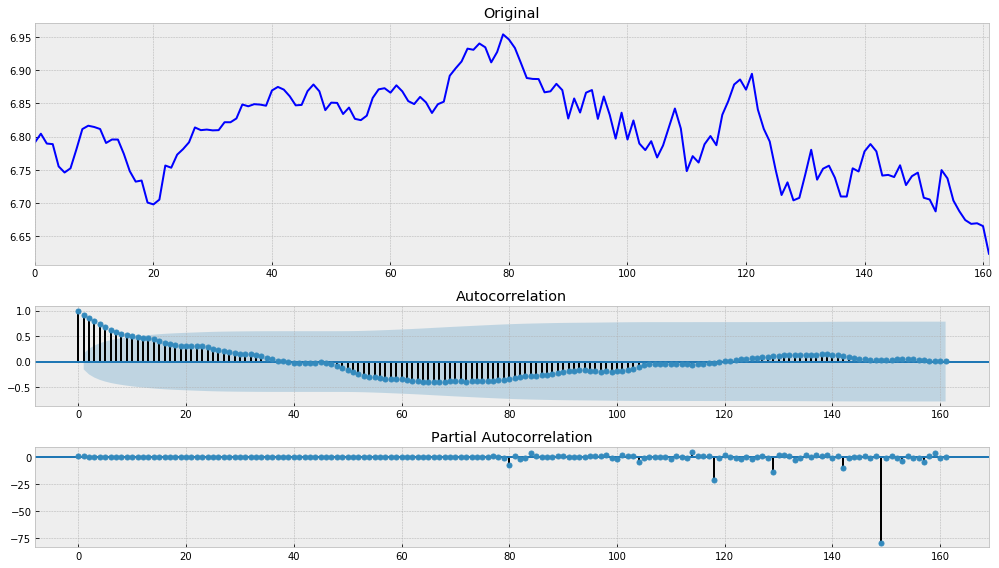

In [199]:
tsplot(weekly_series)

In [200]:
weekly_series = weekly_series[1:] - weekly_series[:-1]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


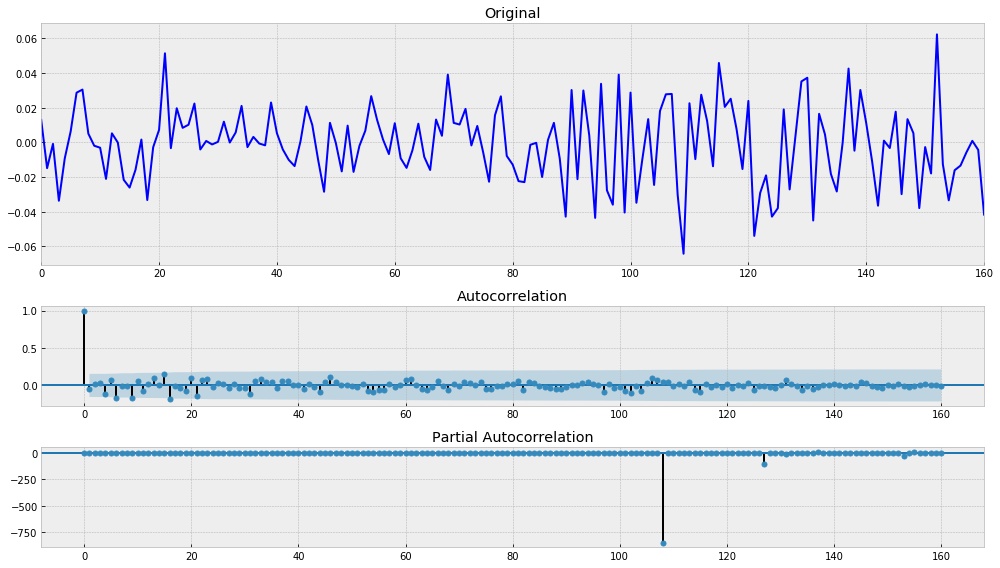

In [201]:
tsplot(weekly_series)

In [202]:
test_stationarity(weekly_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


In [152]:
#готово